In [3]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

In [19]:
cancer='BLCA'

In [28]:
total = pd.read_csv('/home/wbjeong/cancer/JJM/metadata/omics.csv')
raw_value=pd.read_csv('/home/wbjeong/cancer/PORPOISE/datasets_csv_mutsig/tcga_luad_all_clean.csv.zip')

dir = '/home/wbjeong/cancer/PORPOISE/metadata/'
new=total[total.columns.intersection(raw_value.columns)]

new.to_csv(dir+cancer+'_omics.csv',index=False)
print(new.shape)

(69, 1559)


In [20]:
features=pd.read_csv('/home/wbjeong/cancer/PORPOISE/metadata/'+cancer+'_omics.csv')
raw_value=pd.read_csv('/home/wbjeong/cancer/PORPOISE/datasets_csv_mutsig/tcga_luad_all_clean.csv.zip')
for i in range(0,5):
    print(i)
    samples=pd.read_csv('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/'+str(i)+'.csv')
    s=np.load('/home/wbjeong/cancer/JJM/results/SNN/'+cancer+'/'+cancer+str(i)+'.npy')
    df=pd.DataFrame(s)
    df.columns=features.columns[1:]
    df.index=samples.iloc[:,1]
    print(samples)
    if i==0:
        df1=df
    else:
        df1=pd.concat([df1,df],axis=0)
raw_value.index=raw_value['case_id']
raw_value=raw_value.drop_duplicates('case_id')
raw_value=raw_value.loc[df1.index,:]

0
    Unnamed: 0             0
0            0  TCGA-A3-3331
1            1  TCGA-A3-3358
2            2  TCGA-A3-3374
3            3  TCGA-A3-3382
4            4  TCGA-A3-3385
..         ...           ...
64          64  TCGA-DV-5566
65          65  TCGA-DV-5568
66          66  TCGA-DV-A4VZ
67          67  TCGA-EU-5907
68          68  TCGA-GK-A6C7

[69 rows x 2 columns]
1
    Unnamed: 0             0
0            0  TCGA-A3-3323
1            1  TCGA-A3-3349
2            2  TCGA-A3-3365
3            3  TCGA-AK-3426
4            4  TCGA-B0-4706
..         ...           ...
64          64  TCGA-CZ-5988
65          65  TCGA-DV-A4W0
66          66  TCGA-EU-5904
67          67  TCGA-G6-A8L7
68          68  TCGA-T7-A92I

[69 rows x 2 columns]
2
    Unnamed: 0             0
0            0  TCGA-6D-AA2E
1            1  TCGA-A3-3317
2            2  TCGA-A3-3319
3            3  TCGA-A3-3320
4            4  TCGA-A3-3322
..         ...           ...
64          64  TCGA-CZ-5460
65          65  TCGA

KeyError: "None of [Index(['TCGA-A3-3331', 'TCGA-A3-3358', 'TCGA-A3-3374', 'TCGA-A3-3382',\n       'TCGA-A3-3385', 'TCGA-A3-3387', 'TCGA-A3-A6NI', 'TCGA-A3-A8CQ',\n       'TCGA-AK-3458', 'TCGA-AS-3778',\n       ...\n       'TCGA-CJ-5681', 'TCGA-CZ-4865', 'TCGA-CZ-5451', 'TCGA-CZ-5454',\n       'TCGA-CZ-5982', 'TCGA-CZ-5984', 'TCGA-DV-A4VX', 'TCGA-G6-A8L6',\n       'TCGA-G6-A8L8', 'TCGA-MM-A563'],\n      dtype='object', name='0', length=345)] are in the [index]"

In [6]:
filtered_columns = [col for col in df.columns if not col.endswith('_rnaseq')]
raw_value=raw_value.loc[:,filtered_columns]
df1=df1.loc[:,filtered_columns]

In [8]:
df_abs=abs(df1)

In [9]:
df_abs.loc[:,'GCG_rnaseq'].max()

KeyError: 'GCG_rnaseq'

In [10]:
df2=df_abs.mean()
df2=df2.sort_values(ascending=False)
df2.index[:7]

Index(['TTN_mut', 'VHL_mut', 'ADAMTS2_cnv', 'NEUROG1_cnv', 'RN7SKP150_cnv',
       'HTR4_cnv', 'YTHDC2_cnv'],
      dtype='object')

In [11]:
df2.index[:10]

Index(['TTN_mut', 'VHL_mut', 'ADAMTS2_cnv', 'NEUROG1_cnv', 'RN7SKP150_cnv',
       'HTR4_cnv', 'YTHDC2_cnv', 'TNIP1_cnv', 'PCDHGB1_cnv', 'RNF44_cnv'],
      dtype='object')

In [12]:
features = np.array(raw_value.loc[:,df2.index[:7]])
shap_values = np.array(df1.loc[:,df2.index[:7]])
explanation = shap.Explanation(values=shap_values, data=features)


In [13]:
shap_values.shape

(345, 7)

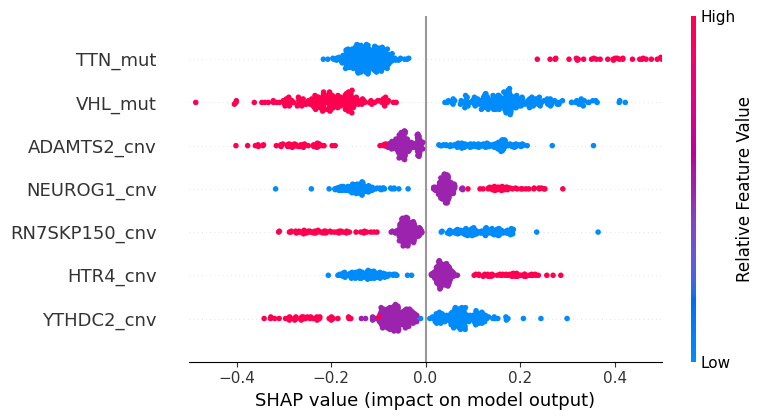

In [14]:
shap.summary_plot(explanation, feature_names=list(df2.index[:7]),max_display=7,show=False,color_bar_label='Relative Feature Value')
ax = plt.gca()
ax.set_xlim(-0.5, 0.5) 
#plt.show()
plt.savefig('/home/wbjeong/cancer/JJM/figures/KIRC/SNN/global_MUT.pdf',bbox_inches='tight')

In [15]:
X_test.shape

NameError: name 'X_test' is not defined

In [16]:
import shap
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
# 데이터 로드
#X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(n_estimators=100)
model.fit(X_train, y_train)

# SHAP 값 계산
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_test)

ModuleNotFoundError: No module named 'xgboost'

In [39]:
features = np.array(df)
shap_values = np.array(df)
explanation = shap.Explanation(values=shap_values, data=features)


In [66]:
df.iloc[ind,:]
# 열 이름이 '_rnaseq'로 끝나는 열만 필터링
filtered_columns = [col for col in df.columns if not col.endswith('_rnaseq')]
filtered_df = df[filtered_columns]
filtered_df=filtered_df.iloc[ind,:]
CNV=np.transpose(filtered_df)
CNV.columns=['Integrated Gradient Attribution']
CNV['abs_value']=abs(CNV['Integrated Gradient Attribution'])
CNV['raw']=list(raw_value.loc[:,CNV.index].iloc[0,:])
CNV=CNV.sort_values('abs_value',ascending=False)
CNV['Genes']=CNV.index


In [167]:
from shap.plots.colors._colors import red_blue, red_blue_circle, red_blue_no_bounds
red_blue1 = [red_blue(i / 5.) for i in range(5)]

In [168]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

NameError: name 'CNV' is not defined

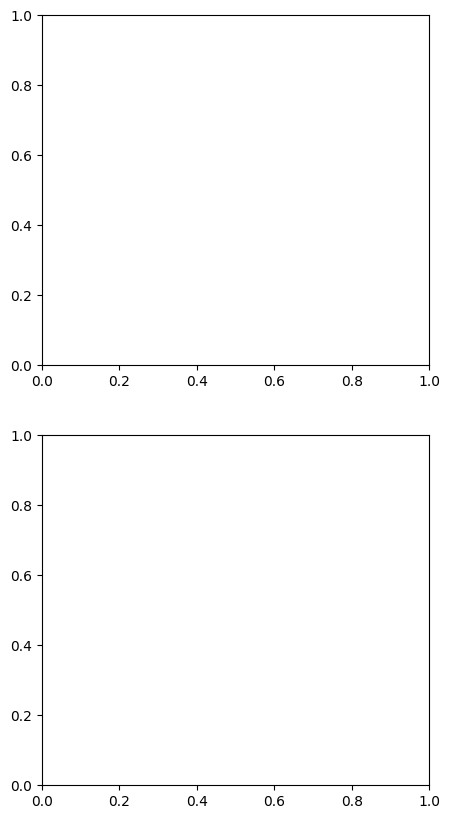

In [169]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 서브플롯 설정
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))  # 1행 2열의 서브플롯

# 첫 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 1.) for i in range(10)]
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=CNV.iloc[:7,:], orient='h',ax=axes[0], palette=red_blue1)
axes[0].set_title('Molecular Explanation')
axes[0].set_xlim(-0.01, 0.01) 
norm = Normalize(vmin=CNV['raw'].min(), vmax=CNV['raw'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar=plt.colorbar(sm, ax=axes[0], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([CNV['raw'].min(),CNV['raw'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[0].legend().remove()
# 두 번째 데이터에 대한 가로 막대 그래프
red_blue1 = [red_blue(i / 6.) for i in range(8)]
sns.barplot(x='Integrated Gradient Attribution', y='Genes',hue='raw', data=RNA.iloc[:7,:], orient='h',ax=axes[1],  palette=red_blue1)
axes[1].set_xlim(-0.01, 0.01) 
norm = Normalize(vmin=RNA['raw'].min(), vmax=RNA['raw'].max())
sm = ScalarMappable(cmap=red_blue, norm=norm)
cbar = plt.colorbar(sm, ax=axes[1], orientation='vertical')
cbar.set_ticks([]) 
cbar.set_ticks([RNA['raw'].min(),RNA['raw'].max()])
cbar.set_ticklabels(['Low', 'High'])
cbar.set_label('Relatvie Feature Value')
axes[1].legend().remove()
plt.savefig('/home/wbjeong/cancer/JJM/figures/KIRC/SNN/'+sample+'.pdf',bbox_inches='tight')